In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

from datetime import datetime, timedelta

from dateutil import relativedelta

In [3]:
def init_graph():
    # using matplotlib's Object Oriented API
    fig, ax = plt.subplots()

    ax.set_title('Energy consumption')
    ax.set_xlabel('Date')
    ax.set_ylabel('Energy (kWh)')
    return fig, ax
    

In [4]:
df_elec = pd.read_csv('./data/elec.csv', sep=";",  usecols=['Date', 'Energie'], parse_dates=['Date'], dayfirst=True, dtype={'Energie': float})
df_elec

,Date,Energie
0,2019-09-24,0.0
1,2019-10-02,3.0
2,2019-10-27,35.0
3,2019-11-02,0.0
4,2019-12-02,129.0
5,2020-01-02,54.0
6,2020-02-02,145.0
7,2020-03-02,150.0
8,2020-04-02,169.0
9,2020-05-02,196.0


In [5]:
period = df_elec.Date.dt.to_period("M") # aggreate for month
group_elec = df_elec.groupby(period)['Energie'].sum()
group_elec

Date
2019-09      0.0
2019-10     38.0
2019-11      0.0
2019-12    129.0
2020-01     54.0
2020-02    145.0
2020-03    150.0
2020-04    169.0
2020-05    196.0
2020-06    150.0
2020-07    167.0
2020-08    151.0
2020-09     78.0
2020-10    115.0
2020-11    201.0
2020-12    166.0
2021-01    114.0
2021-02    185.0
2021-03    185.0
2021-04    160.0
2021-05    158.0
2021-06    159.0
2021-07    105.0
2021-08    109.0
2021-09     84.0
2021-10     93.0
2021-11    138.0
2021-12     51.0
2022-01    104.0
2022-02    126.0
2022-03    134.0
Freq: M, Name: Energie, dtype: float64

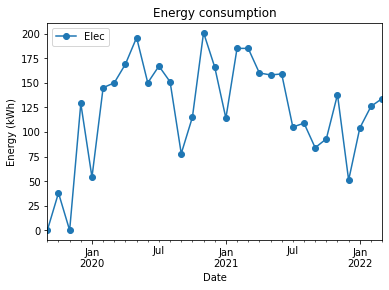

In [6]:
_, ax = init_graph()
group_elec.plot(ax=ax, marker='o', label="Elec")
plt.legend(loc="upper left")

In [7]:
df_gaz = pd.read_csv('./data/gaz.csv', sep=";",  usecols=['Date', 'Volume', 'Energie'], parse_dates=[
                       'Date'], dayfirst=True)
# Calcultate conversion rate V/E
EdivV =  df_gaz['Energie'].divide(df_gaz['Volume'])
print(df_gaz.info())
print(f"Energie/Volume : \n mean: {EdivV.mean()} \n std: {EdivV.std()}")
df_gaz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     43 non-null     datetime64[ns]
 1   Volume   43 non-null     int64         
 2   Energie  43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.1 KB
None
Energie/Volume : 
 mean: 11.406634091537894 
 std: 0.21861915409496865


,Date,Volume,Energie
0,2022-03-14,292,3330.55
1,2021-06-17,14,161.00
2,2021-06-01,1,11.00
3,2021-05-31,52,578.00
4,2021-05-01,3,33.00
5,2021-04-30,72,827.00
6,2021-04-01,0,0.00
7,2021-03-31,67,770.00
8,2021-03-01,3,34.00
9,2021-02-28,82,949.00


In [17]:
# Group data for Month
period = df_gaz.Date.dt.to_period("M")
# .reset_index() w/o that it remove Date column but w/ that graph add bad abscisse
group_gaz = df_gaz.groupby(period).sum().reset_index() 
group_gaz

,Date,Volume,Energie
0,2019-10,21,241.00
1,2019-11,86,971.00
2,2019-12,54,607.00
3,2020-01,106,1212.00
4,2020-02,89,1038.00
5,2020-03,114,1308.00
6,2020-04,54,619.00
7,2020-05,29,332.00
8,2020-06,21,239.00
9,2020-07,20,232.00


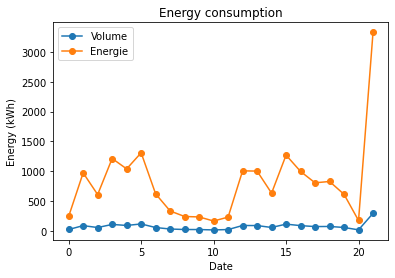

In [18]:
_, ax = init_graph()
group_gaz.plot(ax=ax, marker='o', label="Gaz")
plt.legend(loc="upper left")

In [15]:
# Filtre les données sur une date de début et de fin (ici 8 mois avant l'installation de la chaudiere)
# NB la chaudiere a été installé en juin 2020
# endDate = datetime.strptime('2021-06', "%Y-%m")
# startDate = endDate - relativedelta.relativedelta(months=8)

endDate = pd.Period('2021-06', 'M') 
startDate = endDate - pd.offsets.MonthEnd(8)

mask = (group_gaz['Date'] > startDate) & (group_gaz['Date'] <= endDate)

# Filter date
df_gaz_filtered = group_gaz.loc[mask]
print(df_gaz_filtered)

KeyError: 'Date'

In [11]:
df_gaz_filtered[['Volume', 'Energie']].mean()

Volume      68.875
Energie    788.750
dtype: float64

In [12]:
df_gaz_filtered[['Volume', 'Energie']].sum()

Volume      551.0
Energie    6310.0
dtype: float64